Autor: Iván Gustavo Nieto

<h3> <font color = #5DADE2><b>Introducción </b></font></h3>
<h4><font color = #F09426 > El sistema de encriptación monoalfabético se basa en hacer una asignación a cada una de las letras del mensaje que se pretende codificar y enviar. A lo largo de este cuadernillo desarrollaremos algunas funciones y bloques de código que puedan analizar y desencriptar textos codificados bajo una transformación afín.</font></h4>

<h3> <font color = #5DADE2><b>Importe de modulos </b></font></h3>

In [1]:
# -------------------------------------------------------------------
# Manejo de datos y graficos
# -------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Estilo del comando print
# -------------------------------------------------------------------
from colorama import Fore
from colorama import Style

import urllib


<h4><font color = #F09426 >
La codificación basada en una transformación afín corresponde con una congruencia de la forma:
$$ C \equiv aP + b \text{ }(mod \text{ } m)$$
donde $0 \leq a,b < m$, $(a,m) =1$ y  $ a \neq 0$. El valor de $m$ representa el número de caracteres en el alfabeto. </font> </h4>
<h4><font color = #F09426>
La forma de decifrar estos textos es usando la frecuencia con que aparece cada letra.
Usaremos archivos csv construidos usando web scraping los cuales se pueden encontrar en el siguiente </font> <a href = "https://github.com/ivanc998/IN-Portfolio/tree/main/Project-Decrypt"> enlace</a>. </h4> 

<h3> <font color = #5DADE2><b>Definición de funciones auxiliares</b></font></h3>
<h4> <font color = #F09426> El sistema de cigrafo por transformación afín se basa fuertemente en el hecho de poder establecer un sistema de congruencias y su 
respectiva solución. Una herramienta de vital importancia es el calculo del maximo común divisor entre dos entros positivos. Función 
que se define a continuación. </font> </h4>

In [2]:
def GCD(a, b):
    
    # Calculate the greatest common divisors of the integers a and b
    if b == 0:
        return a
    return GCD(b, a % b)

<h4> <font color = #F09426> La forma de decifrar este tipo de mensajes es suponer que la letra más frecuente en el criptagrama está asociada a la letra más 
frecuente en el conjunto de todas la palabras del ingles. Una vez hecha esta suposición debemos verificar si es posible encontrar
valores $a,b$ que cumplan todas las condiciones mencionadas en un principio. Para ello contruimos una función que dados los coeficientes
supuestos en la asignación inicial encuentra los valores posibles para lograr decifrar el mensaje. </font> </h4>

In [3]:
def linear_congruences(x1, C1, x2, C2, m):
    
    # Find the solutios a and b to the system of linear congruences 
    # ax_1 + b ≡ C1(mod m), ax_2 + b ≡ C2(mod m) where (a,m) = 1,  a ≤ a,b < m and a≠0
    
    relative_primes = [x for x in range(1, m+1) if GCD(x, m) == 1] # Find all relative primes of m
    solutions = [] # List to save all solutions that be found

    for b in range(0, m):
        for a in relative_primes:
            if (((a*x1) + b - C1) % m == 0) and (((a*x2) + b - C2) % m == 0): # Verify all possible pairs in the congrences. 
                solutions.append((a,b)) # If the pair satifies then it is added to the list
                
    return solutions

<h4> <font color = #F09426> Una vez se tienen los candidatos para los enteros $a,b$ entonces se calcula la transformación inversa y se aplica a cada caracter del mensaje para decodificarlo. </font> </h4>

In [4]:
def decrypt_affine_transformation(a, b, m, encrypt_text):
    
    # Decrypt the given text aplying the inverse transformation of ax + b ≡ C(mod m) 
    # Inverse tranformtion x ≡ i(C - b)(mod m) where ia ≡ 1(mod m)
    decrypt_text = ""
    
    # -------------------------------------------------------------------
    # Find the inverse of a mod m
    # -------------------------------------------------------------------
    for i in range(1,m): 
        if (((i*a) - 1) % m ) == 0:
            inverse_a = i
            break
    
    # -------------------------------------------------------------------
    # Aply the inverse tranformation to each word on the message
    # -------------------------------------------------------------------
    for c in encrypt_text:
        if (97 <= ord(c)) and (ord(c) <= 122):
            x = ord(c)-97
            P = ((inverse_a*(x -b)) % m) + 97
            decrypt_text += chr(P)
    return decrypt_text

<h3> <font color = #5DADE2><b>Palabras en el inglés</b></font></h3>
<h4> <font color = #F09426> Como mencionamos anteriormente la estrategia será asociar las letras más frecuentes en el ingles a las más frcuentes en el idioma.
Para ello traeremos los datos necesarios del repositorio de git hub y lo prepararemos para su uso. </font> </h4>

In [5]:
# --------------------------------------------------------------------------------------------------------------------
# Extrect the database with the frecuency of each letter of a repository on gitgub
# --------------------------------------------------------------------------------------------------------------------

url = 'https://github.com/ivanc998/IN-Portfolio/blob/main/Project-Decrypt/csv-files/Frecuency_letters.csv?raw=true' 
words_frecuency = pd.read_csv(url, delimiter = ';') # Cargamos el archivo csv

words_frecuency = words_frecuency.sort_values('stats', axis = 'index', ascending = False, ignore_index = True) # Sort descending the data

# Verify the data are complete and not require be clean
print(words_frecuency.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Letter  26 non-null     object
 1   stats   26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes
None


In [6]:
words_frecuency.transpose().head(2)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
Letter,e,i,a,r,n,t,o,s,l,c,...,y,b,f,v,w,k,z,x,q,j
stats,71312,62067,60076,55180,51921,51652,48487,43672,43138,35632,...,17547,15861,10213,8819,5961,5522,3150,2956,1814,1373


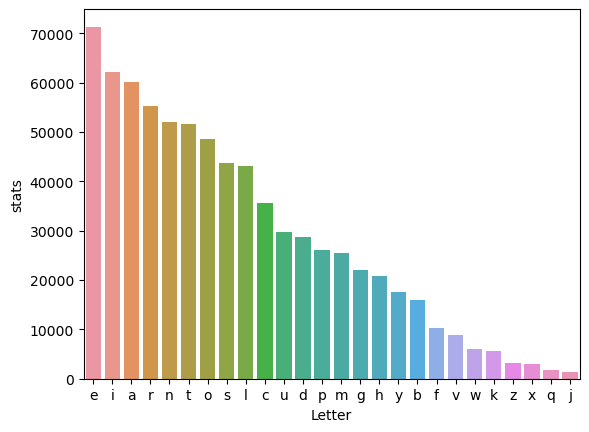

In [7]:
sns.barplot(data = words_frecuency, x = 'Letter', y = 'stats')
plt.show()

<h3> <font color = #5DADE2><b>Mensaje a desencriptar</b></font></h3>
<h4><font color = #F09426>Ahora haremos un proceso similiar al texto que queremos desencriptar. Para ello lo ingresaremos como cadena de texto y crearemos una función que retorne un dataframe con la frecuencia de sus letras. </font></h4>

In [8]:
# --------------------------------------------------------------------------------------------------------------------
# Define function to prepare de message
# --------------------------------------------------------------------------------------------------------------------

def prepare_cryptogram(Text, info):
    cryptogram = Text.replace(' ', '').lower() # Drop ths blank space and become to lower case each letter

    # --------------------------------------------------------------------------------------------------------------------
    # Dataframe of the cryptogram 
    # --------------------------------------------------------------------------------------------------------------------
    letters_cryptogram = [x for x in cryptogram] # Put each character on a list
    aux_df = pd.DataFrame({'lt' : letters_cryptogram}) # Create a dataframe with the list

    Serie = aux_df['lt'].groupby(aux_df['lt']).count() # Find the frecuency of each letter
    sk = Serie.index.tolist()
    Frecuency = [Serie[t] for t in sk] # Build a list with each frecuency
    
    # Join all in a dataframe
    df_cryptogram = pd.DataFrame({'Letter' : sk, 'Frecuency' : Frecuency}).sort_values('Frecuency', ascending = False, ignore_index = True) 
    
    # --------------------------------------------------------------------------------------------------------------------
    # Clean the dataframe 
    # --------------------------------------------------------------------------------------------------------------------
    for J in range(df_cryptogram.shape[0]): # We analyze ech row on the dataframe
    
        lt = df_cryptogram.iloc[J]['Letter'] # Obtain the value in the 'Letter' column
    
        if not(97 <= ord(lt) and ord(lt) <= 123): # If it is not an alphabet element then it is remplaced by a None value
            df_cryptogram.iloc[J, df_cryptogram.columns.get_loc('Letter')] = None
    if info:
        print(f"It has been found {Fore.BLUE}{df_cryptogram.isnull().sum()['Letter']}{ Style.RESET_ALL} element(s) out the alphabet") # Show which elemnts was found
    
    df_cryptogram.dropna(inplace = True)
    df_cryptogram.reset_index(inplace = True,  drop = True)
    
    return [df_cryptogram, cryptogram]

<h4><font color = #F09426>Tratemos de decodificar un texto encriptado con los parámetros $a=5$ y $b=8$. </font></h4>

In [9]:
Text = """pcix wvms ivaf cvya epqw vxza npwl lwiv zvco oapl xuiv xzig cyae zaiv colc jcla hcvm
lwur livm eimc lcip vwvm wzqi yhcc llwg ciul aofp ascu unez wzwu chhc szwj c"""

cryptogram_data = prepare_cryptogram(Text, True)
cryptogram_data[0].transpose().head(2)

It has been found 1 element(s) out the alphabet


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Letter,c,v,i,w,l,a,z,p,u,m,...,h,o,s,y,n,q,j,g,f,r
Frecuency,17,12,11,11,11,9,8,6,6,5,...,4,4,3,3,2,2,2,2,2,1


In [10]:
cryptogram_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Letter     22 non-null     object
 1   Frecuency  22 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


<h3> <font color = #5DADE2><b>Decifrado</b></font></h3>
<h4><font color = #F09426> La forma de proceder en este punto es probar todas las formas de asignar los valores mas frecuentes en el criptograma teniedo como referencia el dataframe words_frecuency, generar el sistema de congruencias lineales y finalmente vericar si este posee solución. Por cada asignación cuyo sistema tenga solución, tendremos tantas formas de desencriptar como soluciones encontremos. Así debemos analizar cada mensaje y encontrar el que de como resultado un texto legible.</h4>

In [11]:
def higher_frequency_assignations(words_frecuency, cryptogram_data):
    
    df_cryptogram, cryptogram = cryptogram_data[0], cryptogram_data[1]
    
    options_decrypt = [] # List to add all ways decrypt the

    # --------------------------------------------------------------------------------------------------------------------
    # Assign the most frequent values on the crytogram
    # --------------------------------------------------------------------------------------------------------------------
    C1 = ord(df_cryptogram.iloc[0]['Letter']) - 97 
    C2 = ord(df_cryptogram.iloc[1]['Letter']) - 97

    fw_size = words_frecuency.shape[0] # Define the length of dataframe  with words list

    # --------------------------------------------------------------------------------------------------------------------
    # Do the possible assignations of the most frequent values
    # --------------------------------------------------------------------------------------------------------------------
    for i in range(fw_size - 1):
        for j in range(i+1, fw_size):

            x1 = ord(words_frecuency.iloc[i]['Letter']) - 97
            x2 = ord(words_frecuency.iloc[j]['Letter']) - 97

            solutions = linear_congruences(x1 = x1, C1 = C1, x2 = x2 , C2 = C2, m = 26) # Verify if is possible the assignation 

            if len(solutions) != 0:
                for s in solutions: # Use the solutions to decrypt the mesagge
                    m = decrypt_affine_transformation(a = s[0], b = s[1], m = 26, encrypt_text = cryptogram)
                    options_decrypt.append(m) # Save the result
    return(options_decrypt) 

In [12]:
options_decrypt = higher_frequency_assignations(words_frecuency, cryptogram_data)

<h4><font color = #F09426>Dada la cantidad de opciones, mostraremos en pantalla solo las primeras $10$. </font></h4>

In [13]:
cont = 1
for x in options_decrypt:
    print(Fore.BLUE, '-------------------------------------------')
    print(f'  Option {cont}') 
    print(Fore.BLUE, '-------------------------------------------', Style.RESET_ALL)
    print('\t',x)
    cont += 1
    if cont == 11:
          break
print('\nTotal options: ', len(options_decrypt))

 -------------------------------------------
  Option 1
 ------------------------------------------- 
	 readingcanopenyourmindtobrilliantnewworldsandtakeyoutoanewlevelofenglishlanguagelearningitmayfeellikeaslowprocessbutitiseffective
 -------------------------------------------
  Option 2
 ------------------------------------------- 
	 reglctqsgtmfetumwractldmzrchhcgtdteiimrhlkgtldgoeumwdmgteihepehmxetqhckjhgtqwgqehegrtctqcdaguxeehhcoegkhmifrmsekkzwdcdckexxesdcpe
 -------------------------------------------
  Option 3
 ------------------------------------------- 
	 reyjkluoylgbeligcrqkljhgtrkvvkylhlessgrvjmyljhyaeigchgylesvexevgzeluvkmpvylucyueveyrlklukhqyizeevvkaeymvgsbrgoemmtchkhkmezzeohkxe
 -------------------------------------------
  Option 4
 ------------------------------------------- 
	 reqhsdykqdaxedwairgsdhlanrsjjsqdldeccarjhoqdhlqmewailaqdecjefejabedyjsovjqdyiqyejeqrdsdyslgqwbeejjsmeqojacxrakeoonilslsoebbeklsfe
 -------------------------------------------
  Option 5
 -------

<h4><font color = #F09426> Se puede observar que la opción $1$ presenta un texto legible. Sin embargo con las herramientas que tenemos hasta ahora, hay un sistema ineficiente a la hora de detectar el texto correcto, ya que tenemos un total de 156 opciones que deberiamos analizar manualmente para poder encontrar el texto correcto. </font></h4>
<h4><font color =#F09426>
Vamos a fijar nuestro objetivo ahora en corregir este aspectos del programa, de tal forma que el sistema reconozca cual de sus opciones es la correcta y pueda agregar de los espacios correspondientes para recuperar el mensaje original con mayor efectividad. </font></h4>

<h4><font color =#F09426>
Será necesario para el sistema acceder de manera constante a la información de los datadrame con la lista de la palabras; por lo cual importaremos cada uno de ellos para mejorar el procesamiento de la información.</font></h4>

In [14]:
dfs = {}

for x in range(97, 123):
    Key = True
    L = chr(x)
    url = f'https://github.com/ivanc998/IN-Portfolio/blob/main/Project-Decrypt/csv-files/{L.upper()}_words.csv?raw=true'
    
    while Key:
        try:
            dfs[L] = pd.read_csv(url, index_col = 0)
            Key = False
        except Exception as e:
            if not (type(e) is urllib.error.URLError):
                print(e)
                break

<h4><font color =#F09426>
Ahora definimos una función que dado un texto pueda recorrerlo y detectar las palabras que en el se encuentran; finalmente retornará un porcentaje del texto reconocido junto con los espacios en las palabras encontradas.
</font></h4>

In [57]:
def percent_real_text(Text, df):
    
    # This function recibes as patameters a text and a dictionary with all the words on the language
    # Returns a list with the percent recognized and the text adding some tabs with the word found
    
    if type(Text) is str: # Only will be accepted the objects of type str
        
        Text = Text.replace(' ','').lower() # Drop the tabs and use only lowercase letters
        tabular_text = '' # Create a empty word to save the words found
        
        skips = 0 # Define a variable to count all letters no recognized 
        index = 0 # Define an index to search on the given text
        
        while index < len(Text): # Do the process only with the index be less than the length
            
            if 97 <= ord(Text[index]) and ord(Text[index]) <= 122: # Search words justo with the letters on the alphabet
                
                # --------------------------------------------------------------------------------------
                # Prepare the wodos beggining with the current letter and their leghts 
                # --------------------------------------------------------------------------------------
                Ls = df[Text[index]]['Length'].groupby(df[Text[index]]['Length']).count().sort_values(ascending = False).index.tolist()
                Lst = [int(x) for x in Ls if x <= len(Text) - index] # List with all lenghts to search
                
                try: # When we filter the list might be empty, in this case we skip the remaining text
                    
                    # Define the last and the min leghts to search 
                    last_length = Lst[-1] 
                    min_length = min(Lst)
                    
                except:
                    min_length = 2*(len(Text) - index) # This is not the minimun but we define so, to use the conditional block of remaining text
                    
                if len(Text) - index < min_length: # Verify if the remaining text can be a word
                    
                    tabular_text += ('{F_R}' + Text[index:] + '{S}') # In this case the reaining text could not be found, so it is marked as unrecognized
                    
                    ## Calculate the new index and update the skip letters
                    skips += (len(Text) - index)
                    index = len(Text)
                
                for j in Lst: # Search wors with all possible lenghts
                    if index + j - 1 < len(Text): 
                        
                        aux_text = Text[index : (index + j)]
                    
                        if(aux_text in df[Text[index]].values): # Define a fragment to the text and verify if it is a word on the dictionary 
                            
                            index += j # If find the word, locate the next index to search and save the word found adding a tab
                            tabular_text +=  ('{F_G}' + aux_text + '{S} ')
                            break
                            
                        else:
                            if j == last_length: # If it doesn't find the word, verify if it was the last leght
                                
                                tabular_text += ('{F_R}' + Text[index] + '{S}') # Mark the character as a unrecognized word 
                                
                                # Calculate the new index and update the skip letters
                                skips += 1
                                index += 1
                                
            else: # If the character is not a letter, it is marked as a unrecognized 
                
                tabular_text += ('{F_R}'+ Text[index] + '{S}')
                
                # Calculate the new index and update the skip letters
                skips +=1
                index += 1
                
        percent = (1 - (skips/len(Text)))*100 # Calculate the percent 
        final_list =  [percent , tabular_text] # Define the list to return 
        
        return  final_list
                
    else:
        raise TypeError('Text was expected being a str object')

In [148]:
def style_text(Text, action = 'print', eval_real_percent = True):
    
    # Recibes as parameters three values. 
    # A text to process
    # A str which could be 'print' or 'return' to indicate tha way to proceed with result. Default 'print'
    # A boolean value which indicate whether the system have to process the text with percent_real_text or not. Default True 
    
    if eval_real_percent: # Process the text if the user did not change the value eval_real_percent
        Text = percent_real_text(Text, dfs)[1]
        
    # Give the style to the given text
    style_dict = {'F_R' : Fore.RED , 'S' : Style.RESET_ALL , 'F_G' : Fore.GREEN} # Red -> unrecognized, blue -> recignized
    Text = Text.format(**style_dict)
    
    if action == 'print': # Execute the options choosen 
        print(Text) 
    elif action == 'return':
        return Text
    else: 
        raise Exception("action was expeted being 'return' or 'print'")

<h4><font color =#F09426>Las funciones definidas, deben ser utilizadas en conjunto para presentar al usuario los resultados de una forma más agradable. Nuestro siguiente paso será establecer la efectividad de reconocimiento que posee nuestro código.</font></h4>

<h3> <font color = #5DADE2><b>Casos de prueba</b></font></h3>
<h4><font color = #F09426> Usaremos el siguiente dataframe para probar la efectividad de nuestro código. </font></h4>

<h4><font color = #F09426>Aquí contamos con cuatro campos. El primero, consta de fragmetos obtenidos de la siguiente <a href = "https://homepage.cs.uri.edu/faculty/wolfe/book/Readings/Reading13.htm"> página</a> haciendo uso de web scraping, el segundo y tercero decodifican los textos del primer campo haciendo uso de transformación afín e intercambio aleatorio de letras respectivamente. Finalmente, el último campo fue generado por el sistema con textos aleatorios.</font></h4>

In [54]:
url = 'https://github.com/ivanc998/IN-Portfolio/blob/main/Project-Decrypt/csv-files/Test_recognize_words.csv?raw=true'
df_test = pd.read_csv(url, index_col = 0) 
df_test.head(6)

,Real text,Affine encrypt,Exchange encrypt,random_text
0,Computer Programming\n\n\n\nWhy Programming?\n...,sa qfezcpf pamp iqqwvmo ryf pam piqq wvmyaeqiy...,ip e srwy tstphtoee mfhcaust phto eemfhupr eou...,pbojpibvwbmrvvmiolyckvbojyvqcjmyawarxvvuqgjrss...
1,Perhaps now you are curious to learn how prog...,fcpr ifuvao yae ipcs epwae uzalcip vr a ofpam ...,sy taosqfp c uproty irtmprqwp jyotfap cstphtoe...,vntdtlgzmtus eezstshzecnctplrhswruicnv ygt tha...
2,A program is a set of step-by-step instructio...,if pampiqwui uc zahuzcfn yuzcfwvu zpeszw avu z...,os tphtoem qoqywpg qwyszuqwy smfqwtr iwm pfqwa...,tmiho hokqogbulpyktszgijpbffzmsbgulwjoiramnplu...
3,\n\nThere are at least three good reasons for ...,zrcp cip ciz lciuzzr pc cm aaxpciuav uhapl c i...,waytyot yowjyoqw wa tyyhp pvtyoqpfq gptjyotf m...,frtpn dppbawwrrjyu kuyrwruzjwkaxkgcddfgllodhf...
4,The computer is only a tool.,zrcs aqf ezcp wuav lyizaal,way ipesrw ytmq p fj uow ppj,mahofhuenyfrd ursndwzxwohdvifkg
5,"If you learn how to write simple programs, yo...",whyaelc ipv r aozao p wz cu wqflcfp ampiquya e...,mguprjy otfapcwpc tmwyqmes jystph toe quprcmjj...,vbaehccyljonujjdjtrawk mzigjyctyegtykftyogcayc...


In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 312
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Real text         313 non-null    object
 1   Affine encrypt    312 non-null    object
 2   Exchange encrypt  312 non-null    object
 3   random_text       313 non-null    object
dtypes: object(4)
memory usage: 12.2+ KB


In [56]:
df_test.dropna(inplace = True)
df_test.drop_duplicates(inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Real text         312 non-null    object
 1   Affine encrypt    312 non-null    object
 2   Exchange encrypt  312 non-null    object
 3   random_text       312 non-null    object
dtypes: object(4)
memory usage: 12.2+ KB


<h4><font color =#F09426>Ahora creamos los porcentajes para cada texto distinguiendo como categoría el tipo de texto. </font></h4>

In [64]:
# -----------------------------------------------------------------------
# Aply the funcyion percent_real_text to the texts on the dataframe
# --------------------------------------------------------------------

# Real text

real_texts = df_test['Real text']
P_real_field = [percent_real_text(T, dfs)[0] for T in real_texts]
cat_RT = ['Real text']*len(P_real_field)

# Text with affine encrypt
affine_texts  = df_test['Affine encrypt']
P_affine_field = [percent_real_text(T, dfs)[0] for T in affine_texts]
cat_AT = ['Affine text']*len(P_affine_field)

# Text with exchage of letters
exchange_texts = df_test['Exchange encrypt']
P_exchange_field = [percent_real_text(T, dfs)[0] for T in exchange_texts]
cat_ET = ['Exchange text']*len(P_exchange_field)

# Random texts
random_texts = df_test['random_text']
P_random_field = [percent_real_text(T, dfs)[0] for T in random_texts]
cat_RDT = ['Random text']* len(P_random_field)

Texts = list(df_test['Real text']) + list(df_test['Affine encrypt']) + list(df_test['Exchange encrypt']) + list(df_test['random_text'])
Percent = P_real_field + P_affine_field + P_exchange_field + P_random_field
Category = cat_RT + cat_AT + cat_ET + cat_RDT
len_text = [len(x) for x in Texts]

df_results = pd.DataFrame({'Text' : Texts, 'Percent' : Percent, 'Category' : Category, 'Length' : len_text}) # Define the dataframe 
df_results.head(5)

,Text,Percent,Category
0,Computer Programming\n\n\n\nWhy Programming?\n...,87.096774,Real text
1,Perhaps now you are curious to learn how prog...,89.655172,Real text
2,A program is a set of step-by-step instructio...,82.608696,Real text
3,\n\nThere are at least three good reasons for ...,84.536082,Real text
4,The computer is only a tool.,91.304348,Real text


In [154]:
df_results['Length'] = [len(x) for x in Texts]

In [158]:
df_results.describe()

,Percent,Length
count,1248.000000,1248.000000
mean,45.872898,116.796474
std,26.951141,53.902138
min,0.000000,4.000000
25%,27.184466,79.750000
50%,34.764186,108.500000
75%,56.942905,149.000000
max,98.901099,385.000000


In [166]:
a, b = 4, 385
dx = (b-a)/10
ranges = [a + (i * dx) for i in range(11)]
labels = ['Range ' + str(i) for i in range(1, 11)]
df_results['Range lengths '] = pd.cut(df_results['Length'], ranges, labels = labels)
df_results

,Text,Percent,Category,Length,Range lengths
0,Computer Programming\n\n\n\nWhy Programming?\n...,87.096774,Real text,140,Range 4
1,Perhaps now you are curious to learn how prog...,89.655172,Real text,69,Range 2
2,A program is a set of step-by-step instructio...,82.608696,Real text,142,Range 4
3,\n\nThere are at least three good reasons for ...,84.536082,Real text,110,Range 3
4,The computer is only a tool.,91.304348,Real text,29,Range 1
...,...,...,...,...,...
1243,zjtvyzyfclfdt gbvrmhepsdwqaknoeltabogw mxrgazh...,36.893204,Random text,105,Range 3
1244,yzx vxbgjcyepskqgtbjuexqpy fkjkmwqrdduohchexdj...,22.641509,Random text,169,Range 5
1245,sqeje hfmyh bqdbncztcxgbiyuzdlmenucsdfmlw omlk...,32.608696,Random text,143,Range 4
1246,xcnp lijcd fzallm infnbskovjpmddxxm lyuhupumsr...,23.214286,Random text,60,Range 2


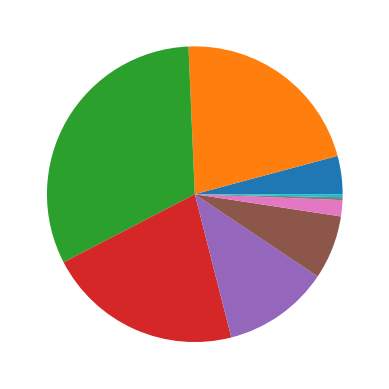

In [171]:
plt.pie(x = df_results['Range lengths '].groupby(df_results['Range lengths ']).count())
plt.show()

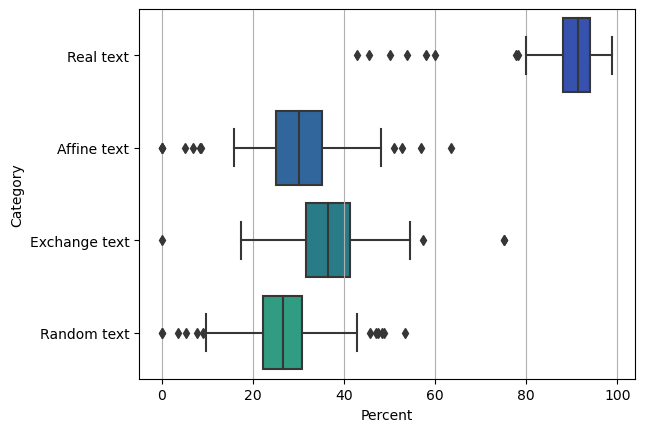

In [153]:
fig, ax = plt.subplots()

palette = sns.color_palette("winter", n_colors = 4, desat = 0.7)
sns.boxplot(data = df_results, x = 'Percent', y = 'Category', ax = ax, orient = 'h', palette = palette)

ax.yaxis.grid(False) # Show the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

plt.show()

<h4><font color =#F09426>Con esto podemos ver que sin contar los datos atipicos, los textos falsos se mantienen en un rango aproximado de $10\%-60\%$, mientras que los textos reales están en $80\%-100\%$; lo que es un excelente indicador de que en terminos generales podremos distinguir diferentes opciones al desencriptar textos. Sin embargo, debemos observar de manera atenta los textos reales que se les fue asignado un porcentaje por debajo del $60\%$. Filtraremos el dataframe para verlos de manera explicita.</font></h4>

In [144]:
df_outliers = df_results[(df_results['Category'] == 'Real text') & ( df_results['Percent'] < 60)]
df_outliers

,Text,Percent,Category
78,\n\n\nDebugging.,53.846154,Real text
108,or an M.,50.000000,Real text
109,in computer science).,57.894737,Real text
247,\n\nThe U.,42.857143,Real text
289,In 1974 the U.,45.454545,Real text


<h4><font color =#F09426>Los textos que no lograron ser reconocidos no posen una longitud demasiado amplia. Apliquemos la función de estilo para visualizarlos mejor. </font></h4>

In [149]:
for i in df_outliers.Text:
    print('---------------------------------\n')
    style_text(i)

---------------------------------




debug ging .
---------------------------------

ora nm.
---------------------------------

inc omput ers cien ce).
---------------------------------



the u.
---------------------------------

in 1974the u.


<h4><font color =#F09426>Podemos inferir los aspectos en los cuales podemos hacer ciertas mejoras para una mayor efectividad. En todos los casos se presenta el inconveniente del salto de lineas, ya que el sistema no está preparado para procesar caractéres especiales como lo es el caso del '\' o inclusive los números, de aquí tambien vemos el inconveniente de que el sistema calcula el porcentaje sobre todos los elementos del texto, lo que reduce drasticamente su reconociblilidad. Finalmente un aspecto que se podría considerar es que en varias ocaciones palabras completas como 'science' no son encontradas porque anteriormente se reconocio una palabra con letras que no correspondían. Una manera de tratar está anomalía es permitir que el sistema escoja las palabras de acuerdo a la que deje menor cantidad de omisiones posibles.</font></h4>

<h4><font color =#F09426>Observemos ahora el caso de los textos falsos reconocidos con un rango mayor al $60\%$.</font></h4>

In [150]:
df_outliers = df_results[((df_results['Category'] == 'Affine text') | (df_results['Category'] == 'Exchange text')) & ( df_results['Percent'] > 60)]
df_outliers

,Text,Percent,Category
536,yae owlliluau ccaez fezf paxescx nycisrf pampiq,63.414634,Affine text
867,w ayr,75.000000,Exchange text
871,w a yr,75.000000,Exchange text


In [151]:
for i in df_outliers.Text:
    print('---------------------------------\n')
    style_text(i)

---------------------------------

ya eowl li lu auccae zfez fpax escxny cis rfpam pi q
---------------------------------

way r
---------------------------------

way r


<h4><font color = #F09426>En este caso ya no tenemos unicamente textos cortos. La gran variedad de palabras reconocidas podría mejorarse un poco adaptando la base de datos que se usa como listado de palabras; incluir quizá palabras más comunes en el lenguaje. Por otro lado, anteriormente mencionamos la posibilidad de acomodar el algoritmo para dejar la menor cantidad de carectéres aislados que sea posible, esto en el caso de textos falsos cortos es un ligero inconveniente, porque aumenta la probabilidad de que se formen palabras de longitud pequeña como ocurrió con la palabra 'way'. </font></h4>

<h4><font color =#F09426>Posteriormente crearemos una nueva función para reconcer textos haciendo uso de las mejoras que han surgido a partir de este análisis exporatorio y compararemos los resultados obtenidos. Ahora debemos definir una función que filtre todas las opciones de desencriptación que ha generado nuestro algoritmo previo. Teniendo en cuenta los rangos de porcentaje para textos reales y una posible aparición de datos atípicos tanto de textos reales como falsos, estableceremos el porcentaje admisible en un $70\%$.</font></h4>

In [145]:
def filter_encrypt_options(options_decrypt):
    
    found = False
    cont = 0
    
    for x in options_decrypt:
        
        A = percent_real_text(x, dfs)
        
        if A[0] >= 70:
            
            cont += 1
            print(Fore.BLUE, f'Option {cont}: accuracy {A[0]}%  \n ---------------------------', Style.RESET_ALL)
            
            style_text(A[1], eval_real_percent = False)
            found = True
    if not found:
        print(Fore.BLUE,'---------------------------\n  Any option was recognized\n ---------------------------\n', Style.RESET_ALL)

In [126]:
filter_encrypt_options(options_decrypt)

 Option 1: accuracy 100.0%  
 --------------------------- 
reading can open your mind to brilliant new world sand take you to anew level of english language learning it may feel like as low process but it is effective 


<h4><font color =#F09426>
Podemos ver que nuestro código ahora solo nos muestra una única opción y además ha reconocido el texto con un $100 \%$ de efectividad. Esto no significa para nada que el algoritmo sea completamente eficaz, sino que logró acomodar de alguna forma todo el texto con palabras conocidas. comparemos con el texto original para ver la precisión de desencriptación. </font></h4>


<h4><font color = 'red'>
"Reading can open your mind to brilliant new worlds and take you to a new level of English language learning.
It may feel like a slow process, but it is effective." </font></h4>

<h4><font color =#F09426>
Al haber filtrado todas las posibilidades el usuario ya podría terminar de acomodar el texto, agregando signos de puntuación y terminar de decifrar el mensaje encriptado. </font></h4>

<h3> <font color = #5DADE2><b>Motivación para nuevos proyectos</b></font></h3>
<h4><font color = #F09426> Intentemos el mismo proceso que ya hemos planteado con el mensaje:</font></h4>

<h4><font color = #F09426>
"accag eaeei kxaax ennxs gdgnl sexxp xmoex likhs uaate begxe oztgc kedmw xlzxe oxxxa hcvls em" </font></h4>

In [23]:
Text = 'accag eaeei kxaax ennxs gdgnl sexxp xmoex likhs uaate begxe oztgc kedmw xlzxe oxxxa hcvls em'
data = prepare_cryptogram(Text, False)

options_decrypt = higher_frequency_assignations(words_frecuency, data)

filter_encrypt_options(options_decrypt)

 ---------------------------
  Any option was recognized
 ---------------------------
  



In [36]:
P = pd.DataFrame({'A': [1, 4], 'B': [4,9]}) 


<h4><font color = #F09426>
Como vemos bajo el uso de una transformación afín, habrá textos encriptados que no sea posible decodificar. Esto se debe al hecho de que hay muchas más formas de distribuir el alfabeto que formas de hacer la elección de $a$ y $b$, esto es, podemos decodificar un mensaje donde su solución no se podrá encontar unicamente con lo que aquí hemos planteado. Se puede extender el razonamiento que se ha aplicado, al asignar cada letra que aparezca en el criptograma; sin embargo hay un inconveniente al proceder de esta manera y es que al probar todas las formas posibles de hacer dichas asignaciones, habrán aquellas que difieran solo en unas pocas letras, con lo que si una es aceptada por el algoritmo de reconocimiento la otra también lo será, es decir, que nuevamente podría aparecer varias posibilidades para un mismo texto. </font></h4>